In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitute combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-62.795213472744074, 18.713166391980366),
 (0.7405795658996794, -97.01928463161846),
 (-21.389451177345336, -161.5385897955313),
 (4.9852906341667165, 27.063271270189432),
 (-32.24005344987958, 89.12995916072538),
 (42.312036035237014, 146.7508524322323),
 (42.967505421115334, 48.64830881127398),
 (-83.70911106158373, -40.75034444505306),
 (-12.435586942575213, 39.72239439268759),
 (-2.1650291608572303, -132.518386551676),
 (-62.74695998075991, -37.59682121000401),
 (23.498714316661747, -115.04405435161632),
 (89.38088748909911, -21.562406800567885),
 (7.57012056095509, -78.37216371565547),
 (1.1849936727557235, 2.599752626805241),
 (-88.53253085845296, 130.72897796110215),
 (3.8327894013516044, 91.67926347949083),
 (79.86510142817761, -48.83473665808276),
 (81.38937558484716, 169.57538787546486),
 (62.0293854013421, 94.68619429640347),
 (3.744303162198733, 133.24913419112812),
 (-56.98237791552701, -146.91080365963643),
 (42.339451992551744, -130.99950029107492),
 (51.61783993384969

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
cities

['bredasdorp',
 'puerto ayora',
 'avarua',
 'obo',
 'carnarvon',
 'nemuro',
 'novokayakent',
 'ushuaia',
 'pemba',
 'atuona',
 'constitucion',
 'illoqqortoormiut',
 'jaque',
 'anloga',
 'hobart',
 'banda aceh',
 'upernavik',
 'pevek',
 'baykit',
 'kloulklubed',
 'mataura',
 'north bend',
 'saint-augustin',
 'dikson',
 'east london',
 'viedma',
 'bluff',
 'rikitea',
 'stantsionno-oyashinskiy',
 'butaritari',
 'guamuchil',
 'namibe',
 'lorengau',
 'sainte-anne-des-monts',
 'taolanaro',
 'busselton',
 'hilo',
 'aleksandrov gay',
 'hamadan',
 'lagoa',
 'inhambane',
 'port alfred',
 'huitzo',
 'cidreira',
 'fenoarivo',
 'sistranda',
 'namatanai',
 'tiksi',
 'ribeira grande',
 'dolores',
 'dingzhou',
 'yellowknife',
 'narsaq',
 'vanavara',
 'lolua',
 'aripuana',
 'qaanaaq',
 'zhuanghe',
 'chokurdakh',
 'kapaa',
 'hambantota',
 'airai',
 'ozgon',
 'thompson',
 'kodiak',
 'shellbrook',
 'jamestown',
 'saint-donat-de-montcalm',
 'victoria',
 'arraial do cabo',
 'bereda',
 'biak',
 'tsihombe',
 

In [7]:
import requests
requests.__version__

'2.24.0'

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime



In [9]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d132834ac529acaa005effd9c0b5236


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginningof the logging.
print("Beginning Data Retrieval      ")
print("------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} |  {city}")
    # Add 1 to the record count.
    record_count += 1
    
        # Run an AP request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})

    # If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass

    
# Indicate that Data Loading is complete.
print('----------------------------------')
print('Data Retrieval Complete           ')
print('----------------------------------')

Beginning Data Retrieval      
------------------
Processing Record 1 of Set 1 |  bredasdorp
Processing Record 2 of Set 1 |  puerto ayora
Processing Record 3 of Set 1 |  avarua
Processing Record 4 of Set 1 |  obo
Processing Record 5 of Set 1 |  carnarvon
Processing Record 6 of Set 1 |  nemuro
Processing Record 7 of Set 1 |  novokayakent
Processing Record 8 of Set 1 |  ushuaia
Processing Record 9 of Set 1 |  pemba
Processing Record 10 of Set 1 |  atuona
Processing Record 11 of Set 1 |  constitucion
Processing Record 12 of Set 1 |  illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 |  jaque
Processing Record 14 of Set 1 |  anloga
Processing Record 15 of Set 1 |  hobart
Processing Record 16 of Set 1 |  banda aceh
Processing Record 17 of Set 1 |  upernavik
Processing Record 18 of Set 1 |  pevek
Processing Record 19 of Set 1 |  baykit
Processing Record 20 of Set 1 |  kloulklubed
Processing Record 21 of Set 1 |  mataura
Processing Record 22 of Set 1 |  north bend
Proc

Processing Record 37 of Set 4 |  dickinson
Processing Record 38 of Set 4 |  leningradskiy
Processing Record 39 of Set 4 |  dashitou
Processing Record 40 of Set 4 |  geraldton
Processing Record 41 of Set 4 |  fort saint james
Processing Record 42 of Set 4 |  coolum beach
Processing Record 43 of Set 4 |  chuy
Processing Record 44 of Set 4 |  jonesboro
Processing Record 45 of Set 4 |  syracuse
Processing Record 46 of Set 4 |  yulara
Processing Record 47 of Set 4 |  cherskiy
Processing Record 48 of Set 4 |  christchurch
Processing Record 49 of Set 4 |  sibolga
Processing Record 50 of Set 4 |  kiama
Processing Record 1 of Set 5 |  wuwei
Processing Record 2 of Set 5 |  georgetown
Processing Record 3 of Set 5 |  kaolack
Processing Record 4 of Set 5 |  tubuala
Processing Record 5 of Set 5 |  saint george
Processing Record 6 of Set 5 |  palaikastron
Processing Record 7 of Set 5 |  ponta do sol
Processing Record 8 of Set 5 |  lebu
Processing Record 9 of Set 5 |  tasiilaq
Processing Record 10 of 

Processing Record 24 of Set 8 |  saryshagan
City not found. Skipping...
Processing Record 25 of Set 8 |  atambua
Processing Record 26 of Set 8 |  longhua
Processing Record 27 of Set 8 |  gizo
Processing Record 28 of Set 8 |  moses lake
Processing Record 29 of Set 8 |  marienburg
Processing Record 30 of Set 8 |  kununurra
Processing Record 31 of Set 8 |  guymon
Processing Record 32 of Set 8 |  coihueco
Processing Record 33 of Set 8 |  saint-pierre
Processing Record 34 of Set 8 |  nalut
Processing Record 35 of Set 8 |  kazalinsk
City not found. Skipping...
Processing Record 36 of Set 8 |  luderitz
Processing Record 37 of Set 8 |  battle creek
Processing Record 38 of Set 8 |  grimsby
Processing Record 39 of Set 8 |  mumford
Processing Record 40 of Set 8 |  prince george
Processing Record 41 of Set 8 |  chumikan
Processing Record 42 of Set 8 |  winston-salem
Processing Record 43 of Set 8 |  svrljig
Processing Record 44 of Set 8 |  kaufbeuren
Processing Record 45 of Set 8 |  jundia
Processi

Processing Record 6 of Set 12 |  araguatins
City not found. Skipping...
Processing Record 7 of Set 12 |  worthington
Processing Record 8 of Set 12 |  maniitsoq
Processing Record 9 of Set 12 |  leopoldina
Processing Record 10 of Set 12 |  gidole
Processing Record 11 of Set 12 |  rabaul
Processing Record 12 of Set 12 |  elat
Processing Record 13 of Set 12 |  bulgan
Processing Record 14 of Set 12 |  shahr-e babak
Processing Record 15 of Set 12 |  kodinsk
Processing Record 16 of Set 12 |  imbituba
Processing Record 17 of Set 12 |  tianpeng
Processing Record 18 of Set 12 |  zhitikara
City not found. Skipping...
Processing Record 19 of Set 12 |  marawi
Processing Record 20 of Set 12 |  victor harbor
Processing Record 21 of Set 12 |  ewa beach
Processing Record 22 of Set 12 |  teya
Processing Record 23 of Set 12 |  zastron
Processing Record 24 of Set 12 |  gadwal
Processing Record 25 of Set 12 |  kuching
Processing Record 26 of Set 12 |  tuensang
Processing Record 27 of Set 12 |  udachnyy
Pro

In [11]:
len(city_data)

567

In [12]:
# convert the array for of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,57.20,54,65,9.17,ZA,2020-11-24 19:12:18
1,Puerto Ayora,-0.74,-90.35,78.80,69,75,13.87,EC,2020-11-24 19:12:18
2,Avarua,-21.21,-159.78,80.60,74,100,4.70,CK,2020-11-24 19:12:18
3,Obo,5.40,26.49,73.99,70,0,5.03,CF,2020-11-24 19:12:18
4,Carnarvon,-24.87,113.63,71.60,83,0,16.11,AU,2020-11-24 19:12:18
5,Nemuro,43.32,145.57,36.41,78,100,5.53,JP,2020-11-24 19:08:30
6,Novokayakent,42.39,47.99,41.00,80,40,6.71,RU,2020-11-24 19:12:18
7,Ushuaia,-54.80,-68.30,46.40,61,75,25.28,AR,2020-11-24 19:10:04
8,Pemba,-12.97,40.52,80.60,83,20,12.75,MZ,2020-11-24 19:12:18
9,Atuona,-9.80,-139.03,78.73,74,15,15.79,PF,2020-11-24 19:12:18


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-11-24 19:12:18,-34.53,20.04,57.20,54,65,9.17
1,Puerto Ayora,EC,2020-11-24 19:12:18,-0.74,-90.35,78.80,69,75,13.87
2,Avarua,CK,2020-11-24 19:12:18,-21.21,-159.78,80.60,74,100,4.70
3,Obo,CF,2020-11-24 19:12:18,5.40,26.49,73.99,70,0,5.03
4,Carnarvon,AU,2020-11-24 19:12:18,-24.87,113.63,71.60,83,0,16.11
...,...,...,...,...,...,...,...,...,...
562,Pacifica,US,2020-11-24 19:12:20,37.61,-122.49,61.00,82,1,4.70
563,Kapoeta,SS,2020-11-24 19:12:54,4.77,33.59,85.48,40,98,8.16
564,Dawei,MM,2020-11-24 19:12:54,14.08,98.20,75.25,84,38,6.06
565,Krasnoselkup,RU,2020-11-24 19:12:54,65.70,82.47,5.31,94,94,10.04


In [14]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']



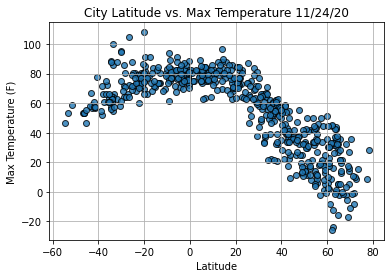

In [16]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

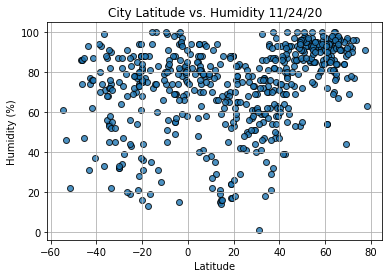

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig2.png')
# Show plot.
plt.show()

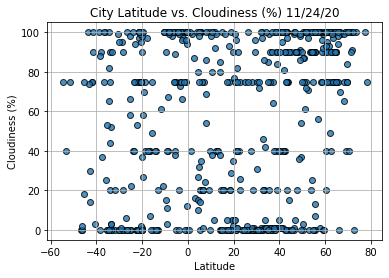

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig3.png')
# Show plot.
plt.show()

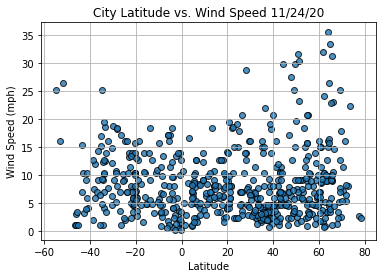

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig4.png')
# Show plot.
plt.show()